# Versuch einen Decisiontree für Klassifizierung von Bildern zu verwenden
## Imports

Bitte installieren Sie zuvor Python-Opencv (am besten mit PI

In [1]:
from sklearn import tree
import cv2 
import os
import glob
import numpy as np

## Test mit zwei Klassen
### Laden und Formatieren der Bilder
Zum Trainieren des DecisionTrees wird ein Auszu des gesamten FACD-Datensatzes verwendet. 
Hierzu werden 32 Originalbilder und die dazugehörigen Bilder des Filters "Amaro" verwendet.
Zum Trainieren werden alle Bilder auf ein Format von 244 x 244 gebracht und anschließend in einen 1D-Vector gebracht.

In [2]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
data_origin = []
data_amaro = []

for f1 in files_origin:
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, (244,244))
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:   
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, (244,244))
    data_amaro.append(amaro.flatten())
    


### Erstellen des DecisionTrees

In [3]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 

X = np.concatenate((data_amaro, data_origin))
print(X.shape)
y = ["amaro" for i in range(32)] +["origin" for i in range(32)]

clf = tree.DecisionTreeClassifier()
clf.fit(X, y) 

(64, 59536)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Anzeige des Trees

[Text(167.4, 163.07999999999998, 'X[48557] <= 1.0\ngini = 0.5\nsamples = 64\nvalue = [32, 32]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

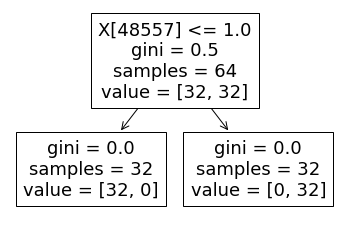

In [4]:
tree.plot_tree(clf)

### Laden von Testbildern
Zum Testen wird ein original Bild und das passende gefilterte Bild verwendet, welches nicht zu den Trainingsdaten gehört.

In [5]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg", cv2.IMREAD_GRAYSCALE)
amaro = cv2.resize(amaro, (244,244))
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg", cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (244,244))
original = original.flatten()

print("Prediction for amaro picture:", clf.predict([amaro]))
print("Prediction for origin picture:", clf.predict([original]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']


Das Ergebnis für dieser Erkennung sieht zunächst gut aus. 
Die zwei Testbilder werden der richtigen Klasse zugeordnet. 
Nun soll es mit drei Klassen probiert werden, da die "gefilterten"-Bilder immer einen schwarzen Rand besitzen und hierdurch eine Zuordnung erfolgen könnte.

## Test mit einer dritten Klasse
### Hinzufügen einer dritten Klasse

In [6]:
img_dir_lofi = "filter_decision_tree/lofi"
data_path_lofi = os.path.join(img_dir_lofi,'*g')
files_lofi = glob.glob(data_path_lofi)
data_lofi = []

for f1 in files_lofi:
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, (244,244))
    data_lofi.append(lofi.flatten()) 

### Erstellen des DecisionTrees

[Text(186.0, 195.696, 'X[58816] <= 0.5\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(148.8, 152.208, 'X[44117] <= 88.0\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(74.4, 108.72, 'X[20790] <= 125.0\ngini = 0.285\nsamples = 29\nvalue = [5, 24, 0]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0]'),
 Text(111.60000000000001, 65.232, 'X[39608] <= 217.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 108.72, 'X[15149] <= 13.5\ngini = 0.353\nsamples = 35\nvalue = [27, 8, 0]'),
 Text(186.0, 65.232, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(260.40000000000003, 65.232, 'X[45636] <= 120.0\ngini = 0.18\nsamples = 30\nvalue = [27, 3, 0]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0]'),
 Text(297.6, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'

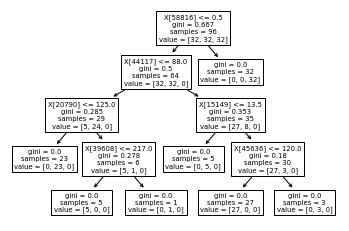

In [7]:
data_lofi = np.array(data_lofi)

X_new = np.concatenate((data_amaro, data_origin, data_lofi))
y_new = ["amaro" for i in range(32)] + ["origin" for i in range(32)] + ["lofi" for i in range(32)]

clf_new = tree.DecisionTreeClassifier()
clf_new.fit(X_new, y_new) 
tree.plot_tree(clf_new)

### Prediction des neuen Trees

In [8]:
lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg", cv2.IMREAD_GRAYSCALE)
lofi = cv2.resize(lofi, (244,244))
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_new.predict([amaro]))
print("Prediction for origin picture:", clf_new.predict([original]))
print("Prediction for lofi picture:", clf_new.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['amaro']


Wie zu sehen ist, klappt die Klassifikation in diesem Fall nicht mehr. :(

Als nächstes probieren wir es mit mehr Testdaten aus.

## Test mit allen FACD-Daten

In [19]:
img_dir_amaro = "FACD_image/Amaro"
img_dir_origin = "FACD_image/Original"
img_dir_origin = "FACD_image/Lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

test_image= "601122" #ignore this picture during fit phase

for f1 in files_origin:
    if test_image in f1:
        continue
    origin = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    origin = cv2.resize(origin, (244,244))
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    if test_image in f1:
        continue
    amaro = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    amaro = cv2.resize(amaro, (244,244))
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    if test_image in f1:
        continue
    lofi = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    lofi = cv2.resize(lofi, (244,244))
    data_lofi.append(lofi.flatten()) 

(2590, 59536)


[Text(137.83431147275087, 212.26285714285714, 'X[56974] <= 10.5\ngini = 0.512\nsamples = 2590\nvalue = [1279, 32, 1279]'),
 Text(15.446366782006923, 201.90857142857143, 'X[35180] <= 223.0\ngini = 0.113\nsamples = 354\nvalue = [16, 5, 333]'),
 Text(12.357093425605537, 191.5542857142857, 'X[2517] <= 0.5\ngini = 0.083\nsamples = 348\nvalue = [10, 5, 333]'),
 Text(6.178546712802769, 181.2, 'X[40523] <= 11.0\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(3.0892733564013843, 170.84571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(9.267820069204152, 170.84571428571428, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(18.535640138408304, 181.2, 'X[39209] <= 11.5\ngini = 0.063\nsamples = 343\nvalue = [6, 5, 332]'),
 Text(15.446366782006923, 170.84571428571428, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(21.62491349480969, 170.84571428571428, 'X[15256] <= 224.5\ngini = 0.046\nsamples = 340\nvalue = [3, 5, 332]'),
 Text(18.535640138408304, 160.49142857142857, 

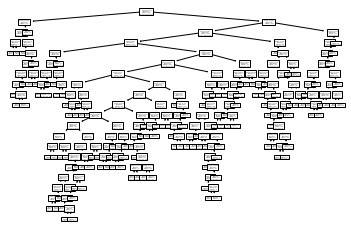

In [10]:
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin,data_lofi))
print(X_full.shape)

y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

clf_full = tree.DecisionTreeClassifier()
clf_full.fit(X_full, y_full) 
tree.plot_tree(clf_full)

In [13]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg", cv2.IMREAD_GRAYSCALE)
amaro = cv2.resize(amaro, (244,244))
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg", cv2.IMREAD_GRAYSCALE)
original = cv2.resize(original, (244,244))
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg", cv2.IMREAD_GRAYSCALE)
lofi = cv2.resize(lofi, (244,244))
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_full.predict([amaro]))
print("Prediction for origin picture:", clf_full.predict([original]))
print("Prediction for lofi picture:", clf_full.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['origin']


Wie zu sehen ist, wird der Entscheidungsbaum immer größer und komplexer. 
Leider haben die zusätzlichen Daten keine korrekte vorhersage gebracht. 

## Test mit Farbbildern
Im letzten Schritt soll nun probiert werden, ob eine Verbesserung mit RGB-Bildern erzielt werden kann.
Um den Trainingsvorgang zu beschleunigen werden wieder die ursprünglichen Trainingsbilder benutzt.

### Erstellen des Modells

(96, 178608)


[Text(200.88000000000002, 195.696, 'X[103939] <= 3.5\ngini = 0.667\nsamples = 96\nvalue = [32, 32, 32]'),
 Text(133.92000000000002, 152.208, 'X[97374] <= 29.5\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(200.88000000000002, 108.72, 'X[165534] <= 105.5\ngini = 0.381\nsamples = 43\nvalue = [32, 11, 0]'),
 Text(133.92000000000002, 65.232, 'X[143600] <= 19.5\ngini = 0.157\nsamples = 35\nvalue = [32, 3, 0]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(267.84000000000003, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(267.84000000000003, 152.208, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

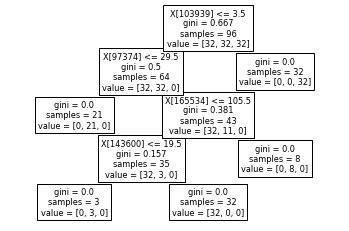

In [16]:
img_dir_amaro = "filter_decision_tree/amaro"
img_dir_origin = "filter_decision_tree/original"
img_dir_lofi = "filter_decision_tree/lofi"

data_path_amaro = os.path.join(img_dir_amaro,'*g')
data_path_origin = os.path.join(img_dir_origin,'*g')
data_path_lofi = os.path.join(img_dir_lofi,'*g')

files_amaro = glob.glob(data_path_amaro)
files_origin = glob.glob(data_path_origin)
files_lofi = glob.glob(data_path_lofi)

data_origin = []
data_amaro = []
data_lofi = []

for f1 in files_origin:
    origin = cv2.imread(f1)
    origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
    origin = cv2.resize(origin, (244,244))
    data_origin.append(origin.flatten()) 
    
    
for f1 in files_amaro:  
    amaro = cv2.imread(f1)
    amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
    amaro = cv2.resize(amaro, (244,244))
    data_amaro.append(amaro.flatten())

for f1 in files_lofi:
    lofi = cv2.imread(f1)
    lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
    lofi = cv2.resize(lofi, (244,244))
    data_lofi.append(lofi.flatten()) 
    
data_origin = np.array(data_origin) 
data_amaro = np.array(data_amaro) 
data_lofi = np.array(data_lofi) 

X_full = np.concatenate((data_amaro, data_origin,data_lofi))
print(X_full.shape)

y_full = ["amaro" for i in range(data_amaro.shape[0])] 
y_full += ["origin" for i in range(data_origin.shape[0])] 
y_full += ["lofi" for i in range(data_lofi.shape[0])]

clf_full = tree.DecisionTreeClassifier()
clf_full.fit(X_full, y_full) 
tree.plot_tree(clf_full)

### Prediction

In [18]:
amaro = cv2.imread("filter_decision_tree/test_data/amaro.jpg")
amaro = cv2.cvtColor(amaro, cv2.COLOR_BGR2RGB)
amaro = cv2.resize(amaro, (244,244))
amaro = amaro.flatten()

original = cv2.imread("filter_decision_tree/test_data/original.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, (244,244))
original = original.flatten()

lofi = cv2.imread("filter_decision_tree/test_data/lofi.jpg")
lofi = cv2.cvtColor(lofi, cv2.COLOR_BGR2RGB)
lofi = cv2.resize(lofi, (244,244))
lofi = lofi.flatten()

print("Prediction for amaro picture:", clf_full.predict([amaro]))
print("Prediction for origin picture:", clf_full.predict([original]))
print("Prediction for lofi picture:", clf_full.predict([lofi]))

Prediction for amaro picture: ['amaro']
Prediction for origin picture: ['origin']
Prediction for lofi picture: ['amaro']


Wie zu sehen ist, gibt es auch bei den farbigen Bildern keine Verbesserung.